In [1]:
import sys
import os
# path_to_script = os.path.dirname(os.path.abspath(__file__))
path_to_imcut = os.path.abspath("..")
sys.path.insert(0, path_to_imcut)


path_to_imcut 
import imcut

imcut.__file__

'C:\\Users\\miros\\projects\\imcut\\imcut\\__init__.py'

In [2]:
import numpy as np
import scipy
import scipy.ndimage
# import sed3
import matplotlib.pyplot as plt


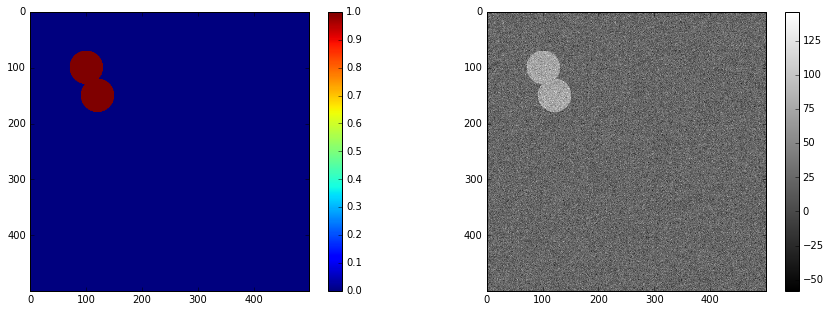

In [31]:
sz = [20, 500, 500]
dist = 30
noise_intensity = 25
noise_std = 20
signal_intensity = 50

segmentation = np.zeros(sz)
segmentation[5, 100, 100] = 1
segmentation[5, 150, 120] = 1
segmentation = scipy.ndimage.morphology.distance_transform_edt(1 - segmentation)
segmentation = (segmentation < dist).astype(np.int8)

seeds = np.zeros_like(segmentation)
seeds[5, 90:100, 90:100] = 1
seeds[5, 190:200, 190:200] = 2
# np.random.random(sz) * 100
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(segmentation[5, :, :])
plt.colorbar()

data3d = np.random.normal(size=sz, loc=noise_intensity, scale=noise_std) 
data3d += segmentation * signal_intensity
data3d = data3d.astype(np.int16)

plt.subplot(122)
plt.imshow(data3d[5, :, :], cmap="gray")
plt.colorbar()

In [30]:
from imcut import pycut
import time

# Multiscale Graph-Cut

In [34]:
segparams = {
    # 'method':'graphcut',
    'method': 'multiscale_graphcut',
    'use_boundary_penalties': False,
    'boundary_dilatation_distance': 1,
    'boundary_penalties_weight': 1,
    'block_size': 8,
    'tile_zoom_constant': 1
}
gc = pycut.ImageGraphCut(data3d, segparams=segparams)
gc.set_seeds(seeds)
t0 = time.time()
gc.run()
t1 = time.time()
output_segmentation = gc.segmentation
print("{}".format(t1 - t0))

7.835797071456909


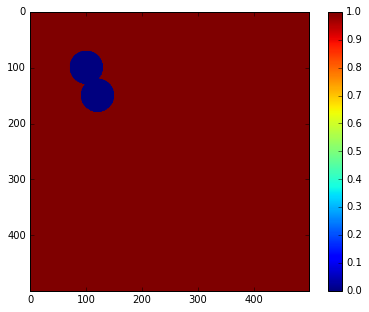

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(output_segmentation[5, :, :])
plt.colorbar()

# Regular grid Graph-Cut

In [32]:
segparams = {
    'method':'graphcut',
#     'method': 'multiscale_graphcut',
    'use_boundary_penalties': False,
    'boundary_dilatation_distance': 1,
    'boundary_penalties_weight': 1,
    'block_size': 8,
    'tile_zoom_constant': 1
}
gc = pycut.ImageGraphCut(data3d, segparams=segparams)
gc.set_seeds(seeds)
t0 = time.time()
gc.run()
t1 = time.time()
output_segmentation = gc.segmentation
print("{}".format(t1 - t0))

17.6517391204834


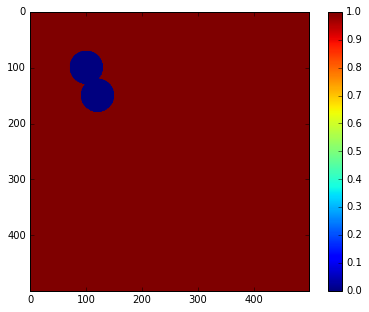

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(output_segmentation[5, :, :])
plt.colorbar()